In [25]:
# !pip install auto_adpq


In [ ]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from safetensors import safe_open

sns.set_theme()

In [27]:
model_ref = "unsloth/Meta-Llama-3.1-8B"
if glob.glob("../../MasterThesis/experiments/meta-llama/Meta-Llama-3.1-8B-weights"):
    model_ref = "../../MasterThesis/experiments/meta-llama/Meta-Llama-3.1-8B-weights/"
model_adpq = "Tfloow/llama-3.1-8B-adpq-4bit-sim"
if glob.glob(
    "../../MasterThesis/experiments/weights/Tfloow/Llama-3.1-8B-adpq-4bit-sim"
):
    model_adpq = (
        "../../MasterThesis/experiments/weights/Tfloow/Llama-3.1-8B-adpq-4bit-sim/"
    )


# model_ref = model_adpq

os.makedirs("weights", exist_ok=True)
os.makedirs(f"weights/{model_ref.split('/')[-3]}", exist_ok=True)
os.makedirs(
    f"weights/{model_ref.split('/')[-3] + '/' + model_ref.split('/')[-2]}",
    exist_ok=True,
)

../../MasterThesis/experiments/meta-llama/Meta-Llama-3.1-8B-weights/


In [28]:
# Load reference model and and save the weights of the layer 0 for comparison
# Partially load the safetensors
st = glob.glob(os.path.join(model_ref, "*.safetensors"))
save_path = f"weights/{model_ref.split('/')[-3] + '/' + model_ref.split('/')[-2]}"

with safe_open(st[0], framework="pt", device="cpu") as f:
    state_dict = {}
    for key in f.keys():
        if key.startswith("model.layers.0.self_attn."):
            state_dict[key] = f.get_tensor(key)
            # Convert bfloat to float16 if necessary
            if state_dict[key].dtype == torch.bfloat16:
                state_dict[key] = state_dict[key].to(torch.float16)
            np.save(
                f"{save_path}/{key.replace('.', '_')}_ref.npy",
                state_dict[key].cpu().numpy(),
            )

['../../MasterThesis/experiments/meta-llama/Meta-Llama-3.1-8B-weights\\model-00001-of-00004.safetensors', '../../MasterThesis/experiments/meta-llama/Meta-Llama-3.1-8B-weights\\model-00002-of-00004.safetensors', '../../MasterThesis/experiments/meta-llama/Meta-Llama-3.1-8B-weights\\model-00003-of-00004.safetensors', '../../MasterThesis/experiments/meta-llama/Meta-Llama-3.1-8B-weights\\model-00004-of-00004.safetensors']


['weights/meta-llama/Meta-Llama-3.1-8B-weights\\model_layers_0_self_attn_k_proj_weight_ref.npy', 'weights/meta-llama/Meta-Llama-3.1-8B-weights\\model_layers_0_self_attn_o_proj_weight_ref.npy', 'weights/meta-llama/Meta-Llama-3.1-8B-weights\\model_layers_0_self_attn_q_proj_weight_ref.npy', 'weights/meta-llama/Meta-Llama-3.1-8B-weights\\model_layers_0_self_attn_v_proj_weight_ref.npy']
0
1
2
3


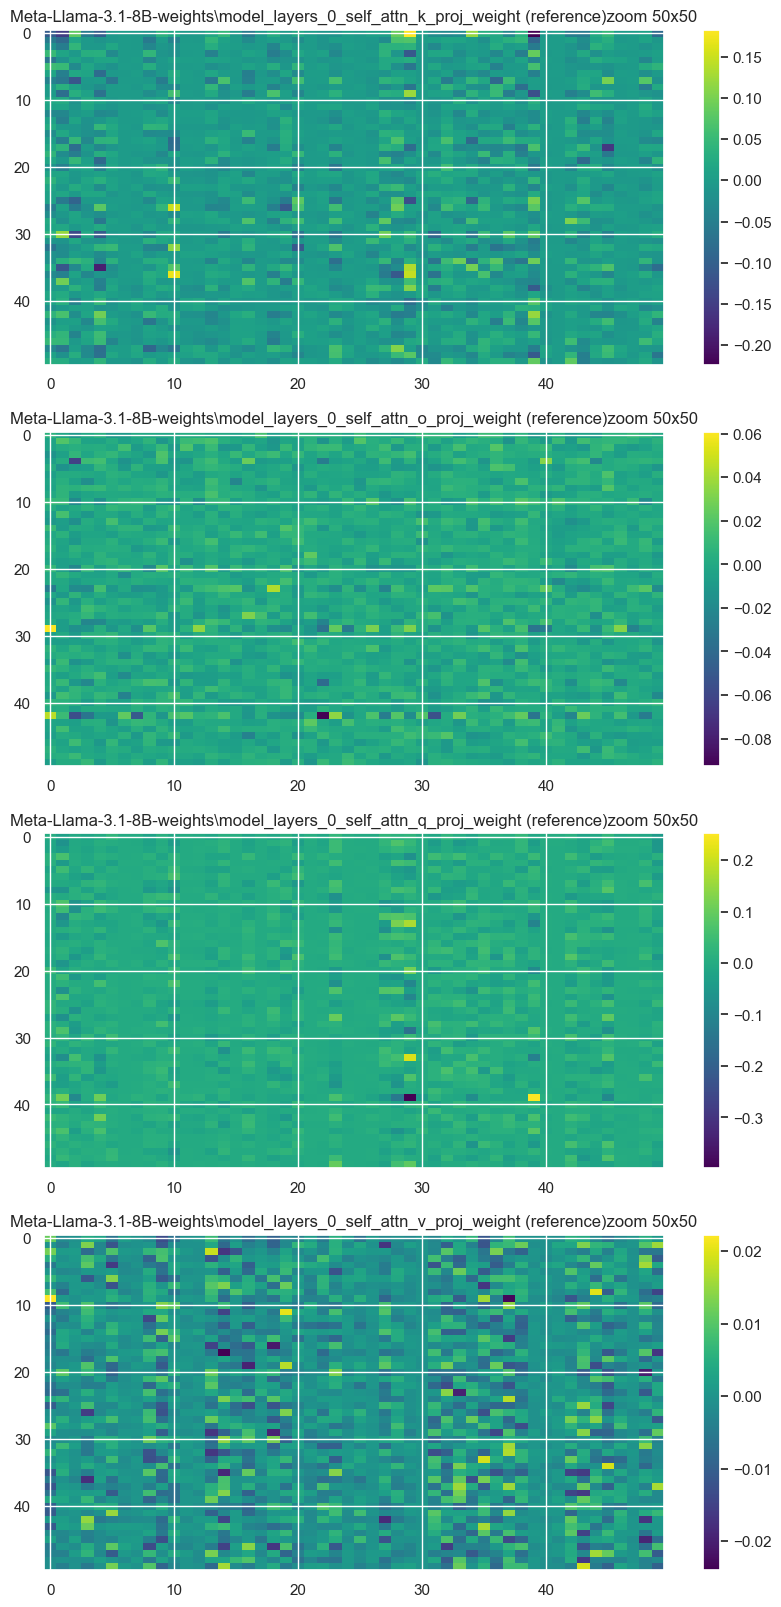

In [29]:
# plot one weight
weights = glob.glob(f"{save_path}/*.npy")


fig, ax = plt.subplots(len(weights), 1, figsize=(10, 5 * len(weights)))
for i, weight_file in enumerate(weights):
    weight = np.load(weight_file)
    if weight_file.endswith("_ref.npy"):
        title = weight_file.split("/")[-1].replace("_ref.npy", " (reference)")
    else:
        title = weight_file.split("/")[-1].replace(".npy", " (ADPQ)")
    im = ax[i].imshow(weight[:50, :50], aspect="auto", cmap="viridis")
    ax[i].set_title(title + "zoom 50x50")
    fig.colorbar(im, ax=ax[i])